# Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

You should:

Learn to predict the probability of churn (for the upcoming month) for each customer

Draw up typical user portraits: select the most outstanding groups and describe their main features

Analyze the factors that impact churn most

Draw basic conclusions and develop recommendations on how to improve customer service:

Identify target groups

Suggest measures to cut churn

Describe any other patterns you see with respect to interaction with customers

# Plan

 1. Download the data
 
 2. Carry out exploratory data analysis (EDA)
 
 3. Build a model to predict user churn
 
 4. Create user clusters
 
 5. Come up with conclusions and basic recommendations on working with customers

##  Download the data

In [1]:
import pandas as pd
import numpy as np

import statistics 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [3]:
try:
    gym = pd.read_csv('/datasets/gym_churn_us.csv')
except Exception as e:
    print('No such file or directory!')
else:
     gym = pd.read_csv('/datasets/gym_churn_us.csv')
finally:
     print('Data is ready')

Data is ready


In [4]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Model Fitness provided you with CSV files containing data on churn for a given month and information on the month preceding it. The dataset includes the following fields:
- 'Churn' — the fact of churn for the month in question

- Current dataset fields:

- User data for the preceding month

 - 'gender'
 - 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
 - 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
 - Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
 - 'Phone' — whether the user provided their phone number
 - 'Age'
 - 'Lifetime' — the time (in months) since the customer first came to the gym

- Data from the log of visits and purchases and data on current membership status

 - 'Contract_period' — 1 month, 3 months, 6 months, or 1 year

 - 'Month_to_end_contract' — the months remaining until the contract expires
 - 'Group_visits' — whether the user takes part in group sessions
 - 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
 - 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
 - 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

## Carry out exploratory data analysis (EDA)

Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).

Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

Build a correlation matrix and display it.

### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).

In [5]:
gym.shape

(4000, 14)

In [6]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
gym.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

No missing values.

In [8]:
gym.duplicated().sum()

0

No duplicates.

In [9]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


There are 4000 customers during the month. Male and female. Age from 18 to 41. Avg age is 29. Most of customers live or work near gym.

In [10]:
std = np.std(gym)
std

gender                                0.499895
Near_Location                         0.361666
Partner                               0.499824
Promo_friends                         0.461874
Phone                                 0.295276
Contract_period                       4.549137
Group_visits                          0.492240
Age                                   3.257960
Avg_additional_charges_total         96.343557
Month_to_end_contract                 4.190773
Lifetime                              3.748798
Avg_class_frequency_total             0.972123
Avg_class_frequency_current_month     1.052774
Churn                                 0.441466
dtype: float64

In [11]:
mean = np.mean(gym)
mean

gender                                 0.510250
Near_Location                          0.845250
Partner                                0.486750
Promo_friends                          0.308500
Phone                                  0.903500
Contract_period                        4.681250
Group_visits                           0.412250
Age                                   29.184250
Avg_additional_charges_total         146.943728
Month_to_end_contract                  4.322750
Lifetime                               3.724750
Avg_class_frequency_total              1.879020
Avg_class_frequency_current_month      1.767052
Churn                                  0.265250
dtype: float64

A low standard deviation means that the data is very closely related to the average, thus very reliable and a high standard deviation means that there is a large variance between the data and the statistical average, thus not as reliable.

### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [12]:
gym['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

2939 of 4000 customers are staying and 1061 are leaving/

In [13]:
print('The percentage of customers who are staying:', 2939 / 4000 * 100)

The percentage of customers who are staying: 73.475


26.565 % customers are leaving

In [14]:
gym.groupby('Churn').mean(). T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


0 - people who still go to the gym

1 - people who are not customers of this gym

Both groups are located near gym.

Equal nomber of customers provided their phone number.

35% of 0 Churn group promoted this gym to friends(signed up through a "bring a friend" offer) anf only 18% from 1 Churn group.

53% of 0 Churn are employees of a partner company and only 35% of Churn 1.

Majority of people who left the gym were short membership holders.

People who still go to the gym are + 29 years old  in average (26 years old who left)

### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

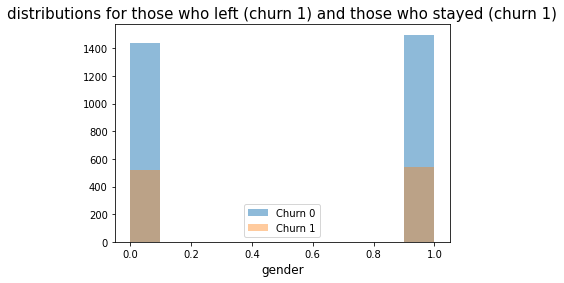

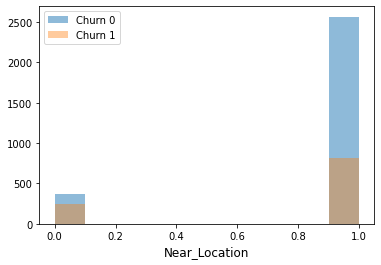

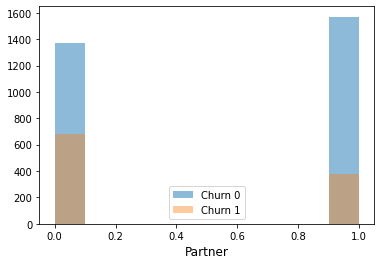

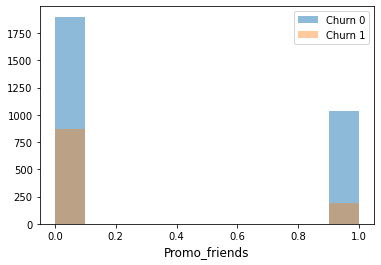

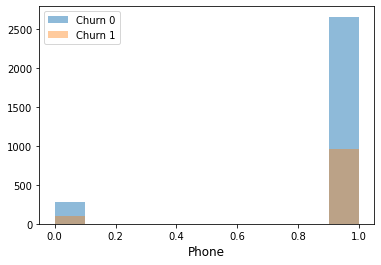

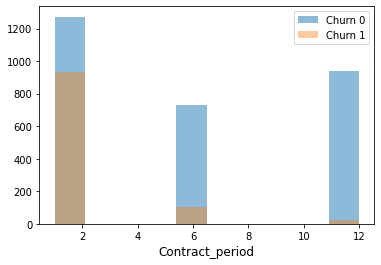

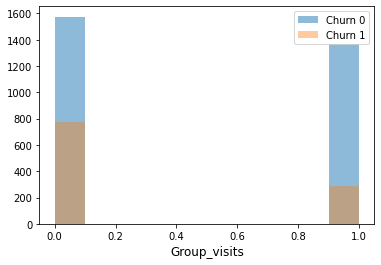

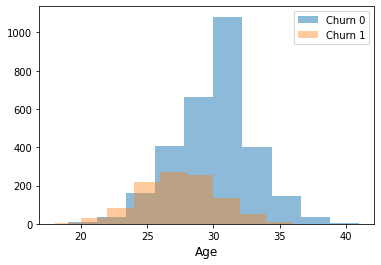

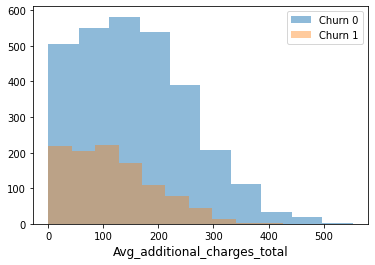

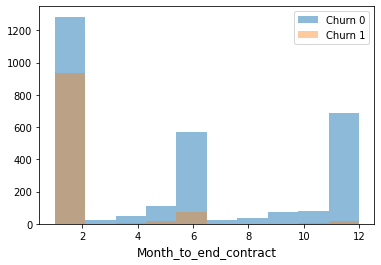

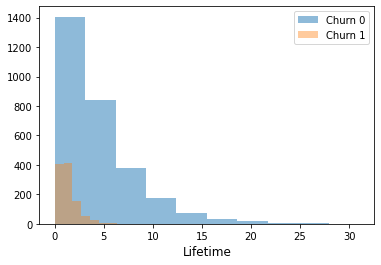

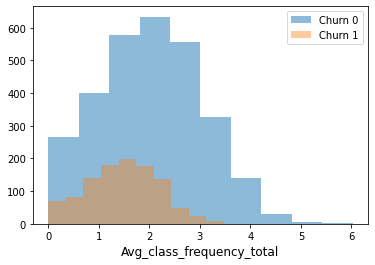

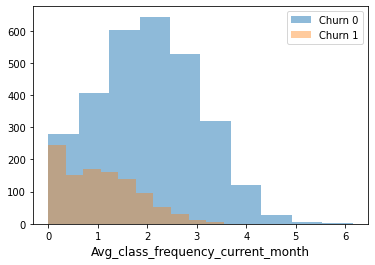

In [15]:
gym_churn_0 = gym.loc[gym['Churn']==0].drop(axis=1, columns='Churn')
gym_churn_1 = gym.loc[gym['Churn']==1].drop(axis=1, columns='Churn')

fig, ax = plt.subplots()
plt.title('distributions for those who left (churn 1) and those who stayed (churn 1)', fontdict={"size":15})
for col in gym_churn_0.columns:

    ax = plt.hist(gym_churn_0[col], alpha=0.5, label= ('Churn 0'))
    ax = plt.hist(gym_churn_1[col], alpha=0.4, label='Churn 1')
    plt.xlabel(col, fontdict={"size":12})
   
    plt.legend(loc='best')
    plt.show();

### Build a correlation matrix and display it.

Text(0.5, 1.0, 'Correlation matrix')

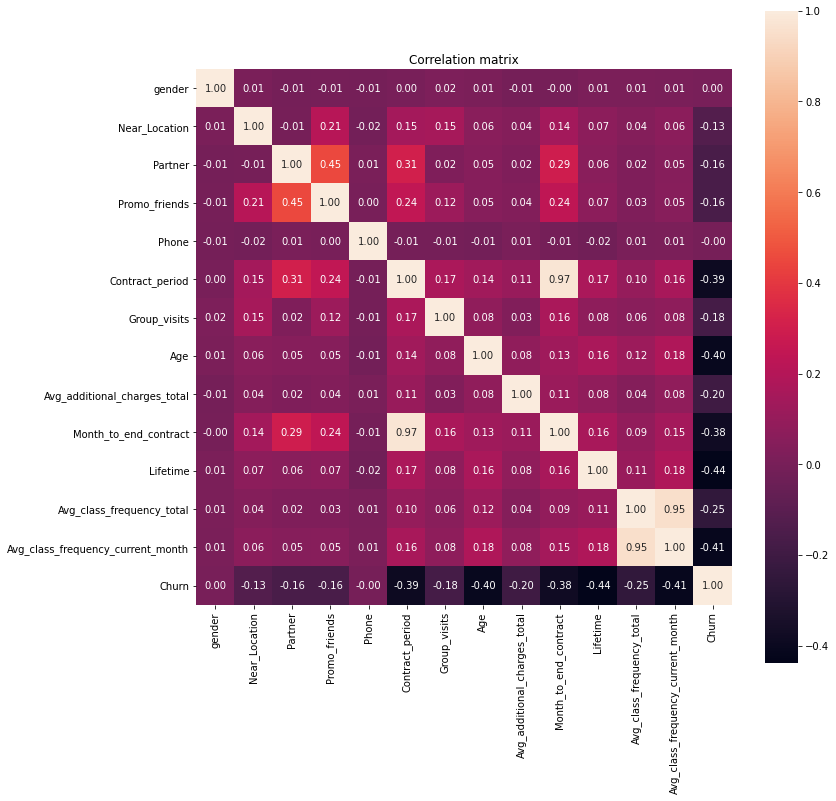

In [16]:
cm = gym.corr() 
plt.figure(figsize = (12,12))
sns.heatmap(cm, fmt='.2f', square = True, annot=True)
plt.title('Correlation matrix')

There is strong negative correlation between:
- contract_perion and curn

- age and curn

- lifetima and churn


### Conclusion

There are 4000 customers during the month. Male and female. Age from 18 to 41. Avg age is 29. Most of customers live or work near gym.

After deviding customers on 2 groups: 0 Churn- people who still go to the gym

                                1 Churn- people who are not customers of this gym
                                
we found out that:

- Both groups are located near gym

- Equal nomber of customers provided their phone number

- 35% of 0 Churn group promoted this gym to friends(signed up through a "bring a friend" offer) anf only 18% from 1 Churn group

- 53% of 0 Churn are employees of a partner company and only 35% of Churn 1

- Majority of people who left the gym were short membership holders

- People who still go to the gym are + 29 years old in average (26 years old who left)

Also from matrix we saw that there is strong negative correlation between:

- contract_perion and curn

- age and curn

- lifetima and churn

## Build a model to predict user churn

Build a binary classification model for customers where the target feature is the user's leaving next month.

Divide the data into train and validation sets using the train_test_split() function.

Train the model on the train set with two methods:

- logistic regression

- random forest

Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

Remember to indicate the random_state parameter when dividing data and defining the algorithm.

### Divide the data into train and validation sets using the train_test_split() function.

In [17]:
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

Split the data into train and validation sets. We are using a classic 80/20 split.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
scaler = StandardScaler()# write your code here
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [20]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Train the model on the train set with two methods:

- logistic regression

- random forest

#### Logistic regression

In [21]:
model = LogisticRegression(random_state=0)
model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [22]:
predictions = model.predict(X_test_st)

In [23]:
probabilities = model.predict_proba(X_test_st)[:,1] 

In [24]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.90
Recall: 0.83
F1: 0.86


We made correct predictions for more then 93%.

In [25]:
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

ROC_AUC: 0.98


The roc_auc metric looks good. The model seems to predict stability quite well/

#### Random forest

In [26]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [27]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [28]:
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [29]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format((roc_auc_score(y_test, rf_probabilities))))

Accuracy: 0.93
Precision: 0.90
Recall: 0.84
F1: 0.87
ROC_AUC: 0.97


### Conclusion

The models are quite same but if we will take look at Recall 83 vs 80, Precision 90 vs 88, roc_auc 98 vs 97. We can see that Logic Regression shows better result.

##  Create user clusters

Set aside the column with data on churn and identify object (user) clusters:

Standardize the data.

Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)

Look at the mean feature values for clusters. Does anything catch your eye?

Plot distributions of features for the clusters. Do you notice anything?

Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

### Standardize the data.

In [30]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [31]:
scaler = StandardScaler() 
sc = scaler.fit_transform(gym.drop(columns = ['Churn'])) 

In [32]:
print(sc[:10]) 

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.79287273 -0.19332863  0.76580519
   0.82634551]
 [ 0.97970588  0.42788074

### Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram

In [33]:
linked = linkage(sc, method = 'ward')

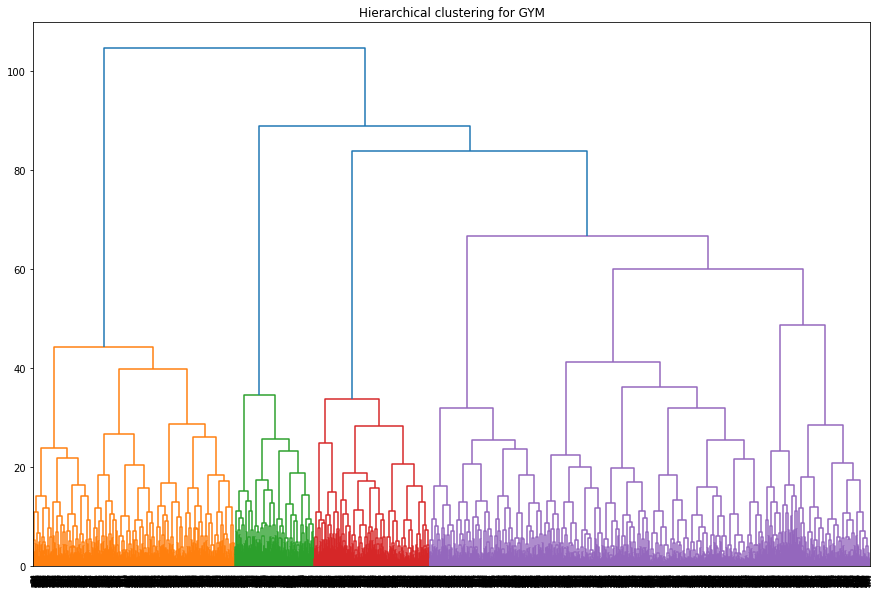

In [34]:
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show()

We have 4 clusters.

### Train the clustering model with the K-means algorithm and predict customer clusters. 

Applying the algorithm to the data and forming a cluster vector

In [35]:
km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(sc) 

### Look at the mean feature values for clusters. Does anything catch your eye?

In [36]:
gym['cluster_km'] = labels

In [37]:
clusters = gym.groupby(['cluster_km']).mean().T
clusters

cluster_km,0,1,2,3
gender,0.523316,0.486815,0.544939,0.503711
Near_Location,0.862694,0.759297,0.861873,0.940631
Partner,0.471503,0.381339,0.343425,0.777365
Promo_friends,0.305699,0.190669,0.205298,0.572356
Phone,0.000000,1.000000,1.000000,1.000000
Contract_period,4.777202,1.899256,2.403027,10.697588
Group_visits,0.427461,0.292765,0.447493,0.536178
Age,29.297927,28.048005,29.989593,29.912801
Avg_additional_charges_total,144.208179,129.704525,157.358764,161.363032
Month_to_end_contract,4.466321,1.805274,2.239357,9.768089


Now we have a new column with clusters and grouped the data by each cluster with mean values of features. 



### Plot distributions of features for the clusters.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

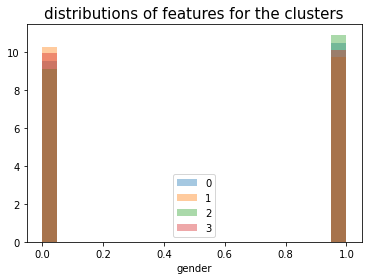

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

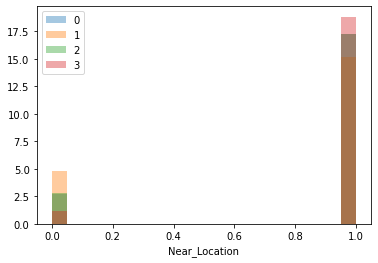

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

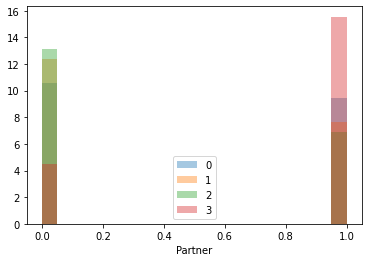

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

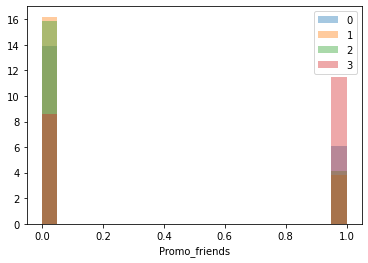

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

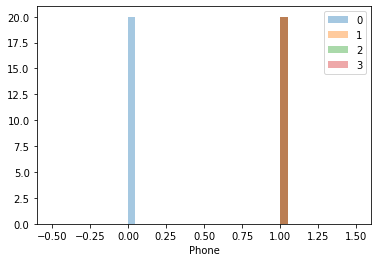

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

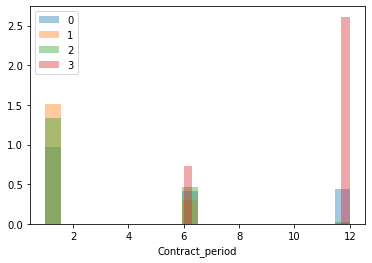

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

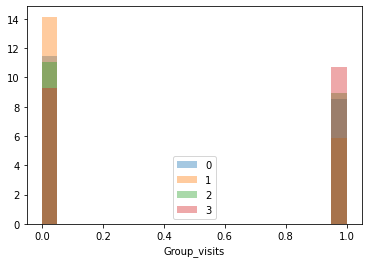

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

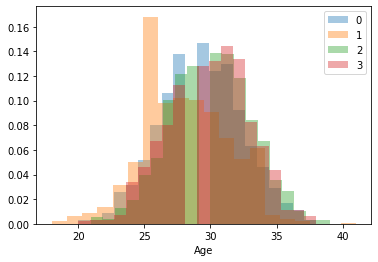

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

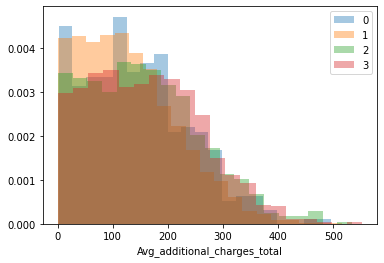

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

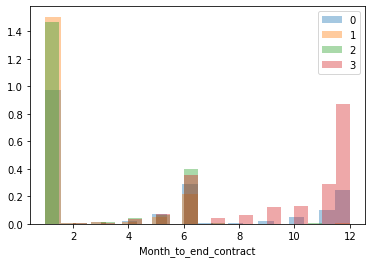

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

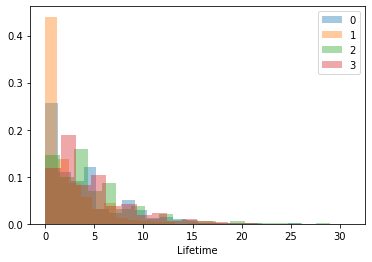

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

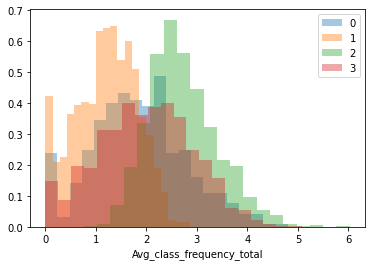

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

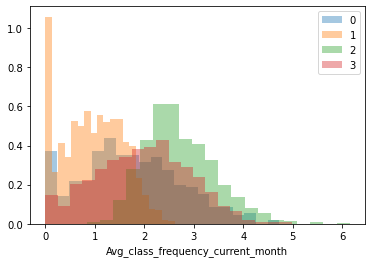

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

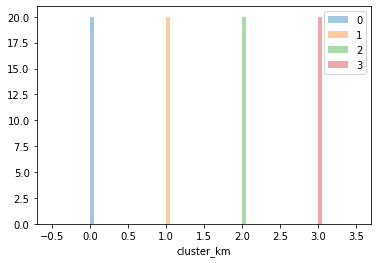

In [38]:
data_nochurn=gym.drop(columns='Churn')
plt.title('distributions of features for the clusters', fontsize=15)
for name in data_nochurn.columns:
    for i in range(0,4):
        ax = sns.distplot(data_nochurn[name].loc[data_nochurn['cluster_km']==i], kde=False, norm_hist=True, bins=20, label=i)
        ax.legend()
    
    plt.show()

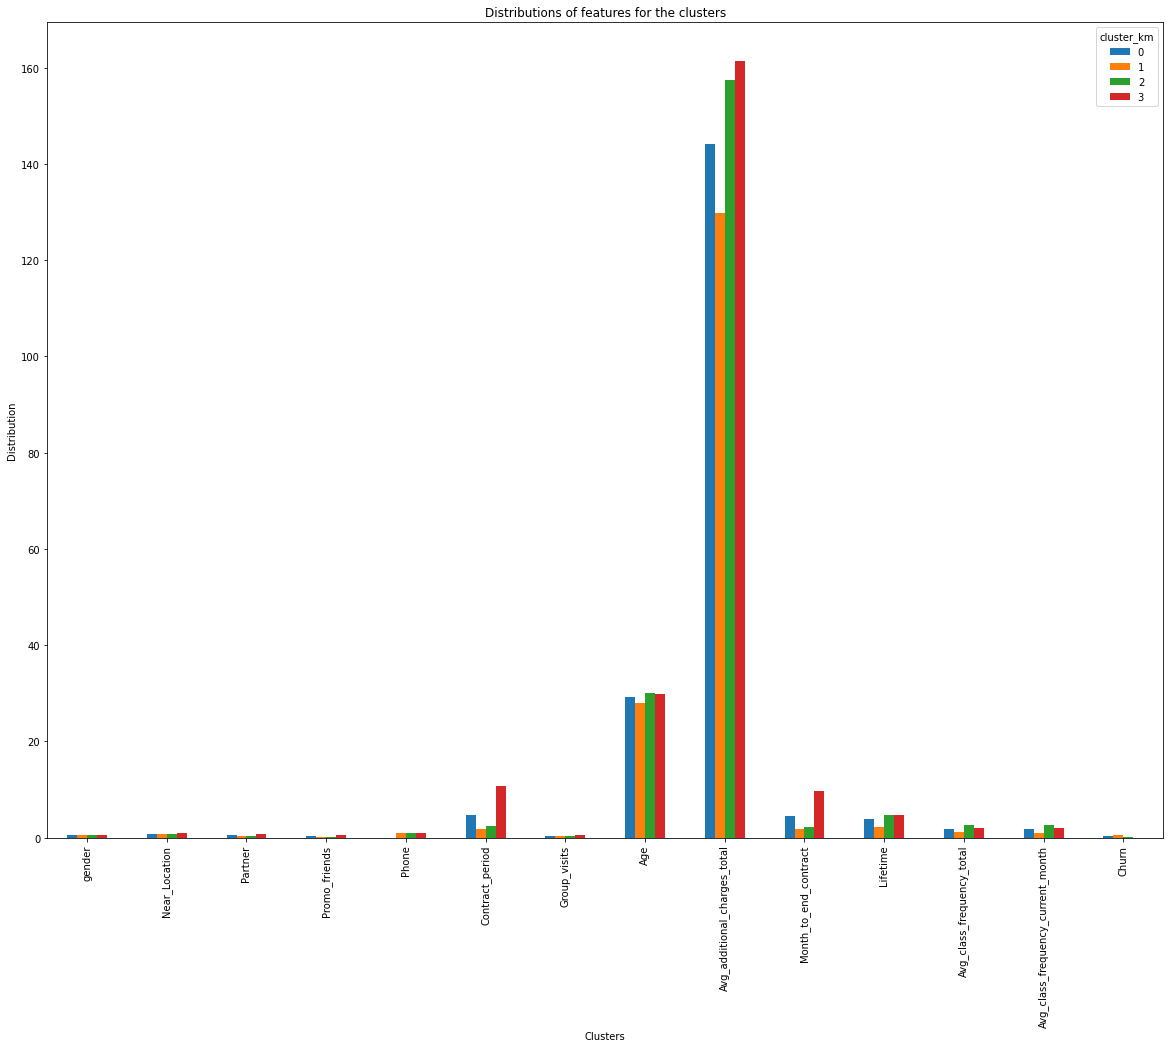

In [39]:
clusters.plot(kind='bar', figsize=(20, 15))
plt.title('Distributions of features for the clusters')
plt.xlabel('Clusters')
plt.ylabel('Distribution')
plt.show()

### Calculate the churn rate for each cluster

In [40]:
churn_rate = gym.groupby('cluster_km')['Churn'].mean()
churn_rate = churn_rate.sort_values(ascending=False)
churn_rate

cluster_km
1    0.559838
0    0.266839
2    0.092715
3    0.029685
Name: Churn, dtype: float64

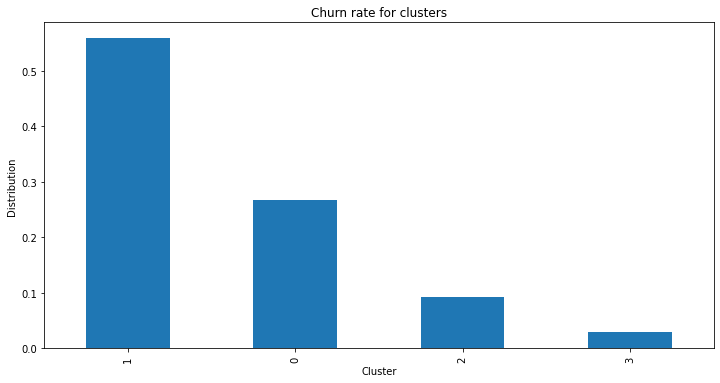

In [41]:
churn_rate.plot(kind='bar', figsize=(12,6), x='cluster_km', y='Churn')
plt.title('Churn rate for clusters')
plt.xlabel('Cluster')
plt.ylabel('Distribution')
plt.show()

More people who curn the gym from cluster 1 and 0 and less from cluster 3.

### Conclusion

We standardized the data, built a matrix of distances and ploted a dendrogram. We trained the clustering model with the K-means algorithm and predicted customer clusters. Looked over mean values for each feature by cluster and vizualized Churn rate for clusters

## Conclusion

We have analyzed the data.

We can conclude that the following features affect the retention of gym clients:

- proximity to home or work;

- special conditions when working in a partner company;

- availability of a promo code;

- long-term contract;

- more frequent attendance of group classes;

- age about 30 years;

- visit the gym 2 times a week.


Recommendations to interact with customers:

- offer discounts on the purchase of longer contracts

- check which group activities are popular and expand their range and reduce the less popular ones (you can reduce the cost of classes that are less interesting to people and expand the line of more interesting workouts)

- make two types of subscription, the first includes group classes, the second does not include (thus those who are not interested in group training will still buy a subscription)

- conduct a user survey and expand additional services (for example, revise the range of the fitness bar or add a sauna to the facilities

- introduce more offers in the style of "purchasing a subscription for a year includes a one-time individual consultation from a trainer"

- offer individual training packages with a trainer